In [130]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# Set image size
S = (100, 100)

# Initialize dataframe
data = []

# Loop through "NORMAL" and "PNEUMONIA" directories
for directory in ["NORMAL", "PNEUMONIA"]:
    for filename in tqdm(os.listdir(f"train/{directory}")):
        if filename.endswith(".jpeg"):
            # Open image and resize to S
            img = Image.open(f"train/{directory}/{filename}")
            img = img.resize(S)

            # Convert image to monochrome and flatten pixels
            img = img.convert("L")
            pixels = np.array(img).flatten()
            pixels += 128

            # Add label and pixels to dataframe
            data.append([directory] + list(pixels))

100%|█████████████████████████████████████████████████████████████████████████████| 3883/3883 [00:17<00:00, 223.40it/s]


In [132]:
# Create dataframe
df = pd.DataFrame(data, columns=["label"] + [f"pixel{i}" for i in range(S[0] * S[1])])

In [133]:
# check the shape of the dataframe
print("Dataframe shape:", df.shape)

Dataframe shape: (5232, 10001)


In [134]:
# check the first 5 rows of the dataframe
print(df.head())

    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0  NORMAL     -33     -34     -33     -10      34       8       5      28   
1  NORMAL      17      18      34      57      44      -2     -35     -38   
2  NORMAL     -62     -63     -46     -14     -19     -20     -17     -12   
3  NORMAL    -128    -128    -128    -128    -128    -128    -105     -70   
4  NORMAL    -117    -128    -128    -119    -106     -90     -72     -63   

   pixel8  ...  pixel9990  pixel9991  pixel9992  pixel9993  pixel9994  \
0      24  ...        -26        -54        -79       -102       -128   
1     -34  ...         19        -43        -85       -110       -128   
2      -6  ...         20          7         -3        -34        -58   
3     -89  ...         -3        -82       -112       -128       -128   
4     -57  ...       -128       -128       -128       -128       -128   

   pixel9995  pixel9996  pixel9997  pixel9998  pixel9999  
0       -128       -128       -128     

In [135]:
# check the distribution of labels
print(df['label'].value_counts())

PNEUMONIA    3883
NORMAL       1349
Name: label, dtype: int64


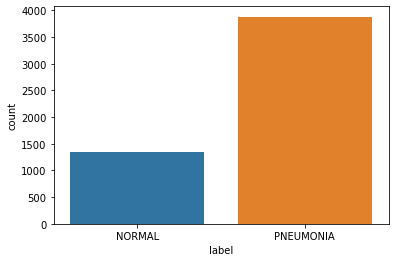

In [136]:
# plot the distribution of labels
sns.countplot(x='label', data=df)
plt.show()

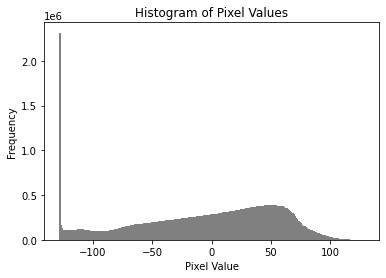

In [140]:
# Flatten pixels into a single array
pixels = df.iloc[:, 1:].values.flatten()

# Plot histogram
plt.hist(pixels, bins=256, range=(-128,128), color='gray')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values')
plt.show()


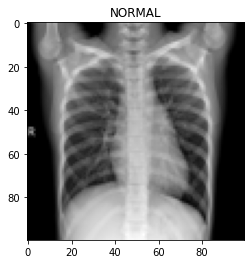

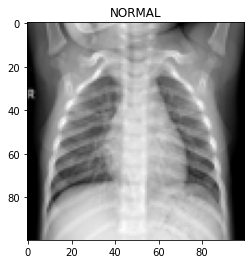

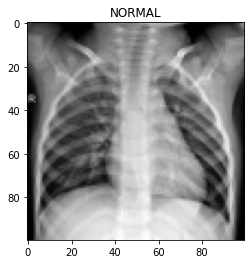

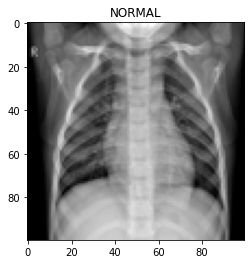

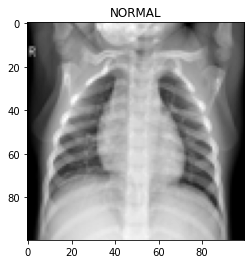

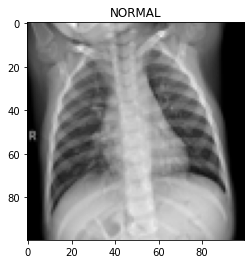

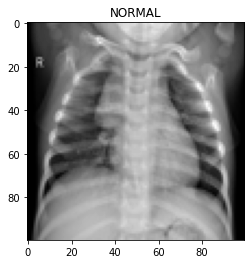

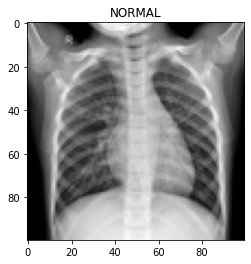

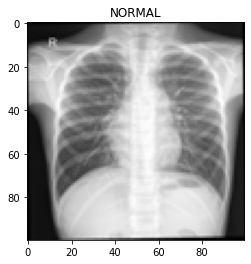

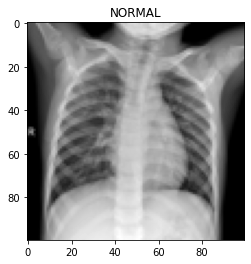

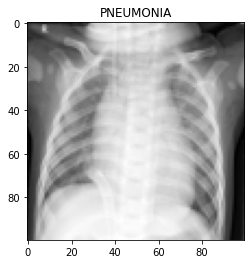

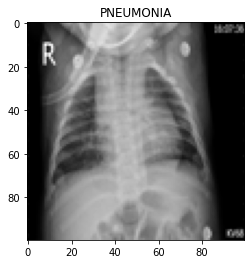

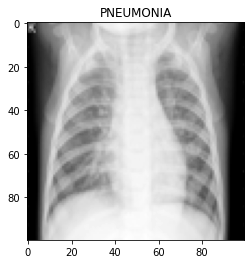

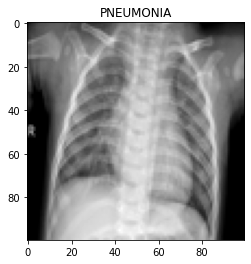

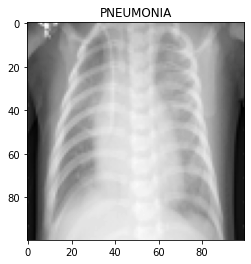

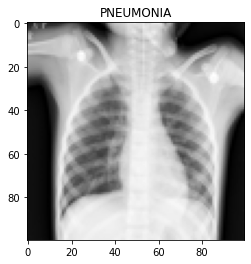

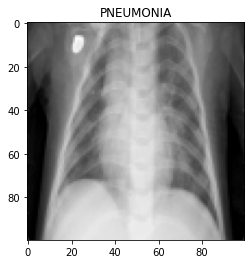

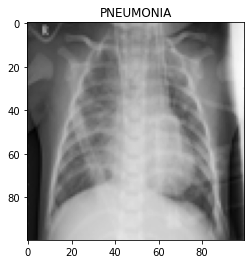

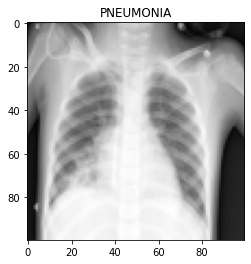

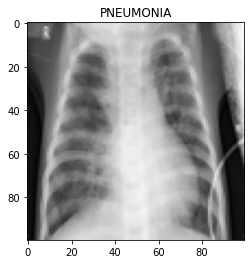

In [147]:
# Plot random 10 images
normal_data = df[df['label'] == 'NORMAL']
normal_sample = normal_data.sample(10)
for i,row in normal_sample.iterrows():
    pixels = row.iloc[1:]
    pixels = pixels.values.astype('float32').reshape(S)
    plt.imshow(pixels, cmap='gray')
    plt.title(row["label"])
    plt.show()
    
pneumonia_data = df[df['label'] == 'PNEUMONIA']
pneumonia_sample = pneumonia_data.sample(10)
for i,row in pneumonia_sample.iterrows():
    pixels = row.iloc[1:]
    pixels = pixels.values.astype('float32').reshape(S)
    plt.imshow(pixels, cmap='gray')
    plt.title(row["label"])
    plt.show()

In [141]:
df.to_csv('dataset.csv',index=False)